# 2d and 3D interactive visualization
This notebook shows how to implement 2D and 3D visualization using matplotlib and pyvista libraries.

In [1]:
import pyvista as pv 
import numpy as np
import matplotlib.pyplot as plt
import readers_preprocessing as rp

Upload saturation field from previous examples using preprocessing functions

In [2]:
sat_coarsened = rp.read_slices_from_numpy('C:/Users/josee/Box/2022-2023 GRA/ct_numpy/sat_coarsened/',
                                          files=['M1','M3','M7','M10'])

## Visuals

### Slice along the length of the core

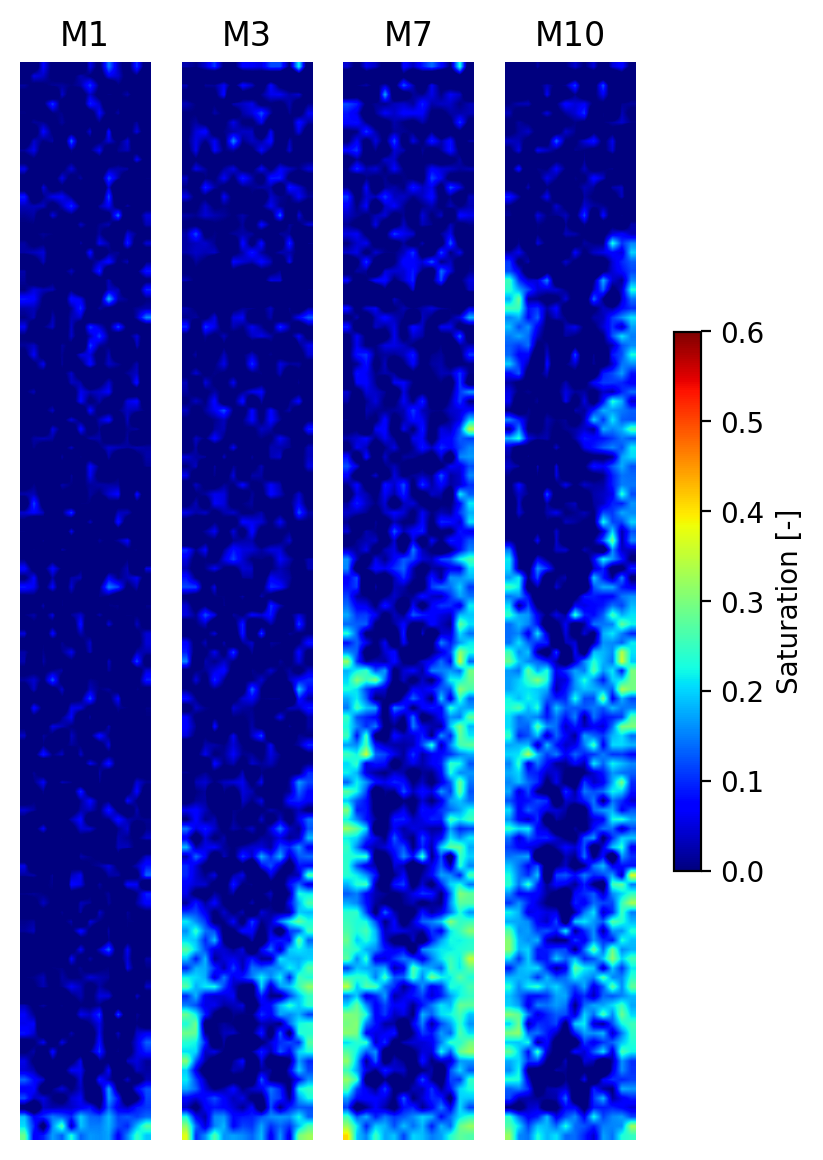

In [3]:
fig, ax = plt.subplots(1,len(sat_coarsened),figsize=(5,7),dpi=200)
for i,key in enumerate(sat_coarsened.keys()):
    im = ax[i].imshow(sat_coarsened[key][int(sat_coarsened[key].shape[0]/2)].T,vmin=0,vmax=0.6,cmap='jet',interpolation='bilinear',origin='lower')
    ax[i].set_title(key)
    ax[i].axis('off')

fig.colorbar(im,ax=ax.ravel().tolist(),shrink=0.5,label='Saturation [-]',orientation='vertical')
plt.show()

# Volume rendering 

In [4]:
def plot_3d_array(arr):
    '''
    Function that plots a 3D numpy array using pyvista
    Inputs:
        arr: numpy array of the slices, size = (NxNxM)
    Outputs:
        A 3D plot of the numpy array using pyvista
    '''
    # Create the pyvista plotter
    p = pv.Plotter()

    # Create the grid
    grid = pv.ImageData()
    grid.dimensions = arr.shape
    grid.origin = (0, 0, 0)
    grid.spacing = (0.25, 0.25, 0.25)

    # Flatten the array and set the values
    flat_arr = arr.flatten(order="F")
    grid.point_data["values"] = flat_arr

    # Set the opacity of nan values to zero
    grid.set_active_scalars("values")
    outline = grid.outline()
    thres = grid.threshold(grid.get_data_range(),all_scalars=True)
    #thres.clip('x',invert=True,inplace=True)
    
    # Scalar bar arguments
    sargs = dict(interactive=True)
    # Add the grid to the plotter
    #p.add_mesh(grid, style='wireframe', color='black',opacity=0.1)
    p.add_mesh(thres, cmap="jet",show_scalar_bar=True,scalar_bar_args=sargs)

    #p.add_mesh(outline)
    # Add mesh threshold
    #p.add_mesh_threshold(thres, cmap = 'jet',show_scalar_bar=True,scalar_bar_args=sargs,opacity='linear')
    # Show the plot
    p.show()
sat_coarsened['M3'][sat_coarsened['M3']<0] = 0
plot_3d_array(sat_coarsened['M3'])

Widget(value="<iframe src='http://localhost:60494/index.html?ui=P_0x1622aeb1d50_0&reconnect=auto' style='width…

### Volume render with a clipped box section

In [8]:
p = pv.Plotter(notebook=True)
# Create the spatial reference
grid = pv.ImageData()

# Set grid dimensions
grid.dimensions = np.array(sat_coarsened['M10'].shape) + 1

# Edit spatial reference
grid.origin = (0, 0, 0)
grid.spacing = (2, 2, 2)

# Add the data values to the cell data
grid.cell_data['values'] = sat_coarsened['M10'].flatten(order='F')

# Clip the domain with a clip box
clipped = grid.clip_box(bounds = [14,30,14,30,0,334])

# Change the lighting to headlight
light = pv.Light(light_type='headlight')
p.add_light(light)

# Add axes 
p.add_axes(interactive=True)
#clipped.plot(cmap='jet',show_scalar_bar=True,clim=[0,0.6])
scalar_args = dict(interactive=True,title='Saturation [-]',
                   font_family='arial',vertical=True)
p.add_mesh(clipped, cmap="jet",show_scalar_bar=True,scalar_bar_args=scalar_args,clim=[0,0.6],nan_opacity=0.0)

# Add floor
p.add_floor()

# Adjust camera position
p.view_isometric()
p.show()

Widget(value="<iframe src='http://localhost:60494/index.html?ui=P_0x1623b764250_1&reconnect=auto' style='width…

### Orthogonal slices

In [10]:
# Create orthogonal slices view
# Set the plotting object
p = pv.Plotter(notebook=True)

# Create the spatial reference
grid = pv.UniformGrid()

# Set grid dimensions
grid.dimensions = np.array(sat_coarsened['M10'].shape) + 1
grid.origin = (0, 0, 0)
grid.spacing = (2, 2, 2)

# Add the data values to the cell data
grid.cell_data['values'] = sat_coarsened['M10'].flatten(order='F')

orthogonal_slices = grid.slice_orthogonal(z=0)
stacked_slices = grid.slice_along_axis(n=8,axis='z')
p.add_mesh(grid.outline(),color='black',opacity=0.1)
p.add_mesh(orthogonal_slices, cmap="jet",show_scalar_bar=True,scalar_bar_args=scalar_args,clim=[0,0.6],nan_opacity=0.0)
p.add_mesh(stacked_slices, cmap="jet",show_scalar_bar=False,scalar_bar_args=scalar_args,clim=[0,0.6],nan_opacity=0.0)
# Add axes
p.add_axes(interactive=True)

# Change the lighting to headlight
light = pv.Light(light_type='headlight')
p.add_light(light)

p.view_isometric()
p.show()

Widget(value="<iframe src='http://localhost:60494/index.html?ui=P_0x16236216290_3&reconnect=auto' style='width…